# Lista 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy

## Zadanie 1
Rozpatrzmy model regresji liniowej
$$ Y_i = \beta_0 + \beta_1 x_i + \epsilon_i, \quad i = 1, 2, ..., n $$
gdzie $\epsilon_i,\; i = 1,2,...,n$ są niezależnymi zmiennymi losowymi $\mathcal{N}(0, \sigma)$. Skonstruuj przedziały ufności dla parametrów $\beta_0$ i $|beta_1$ na danym poziomie ufności $\alpha$. Wyniki wykonaj dla różnych długości prób $n, \alpha \in {0.01, 0.05}$ oraz $\sigma \in {0.01, 0.5, 1}$. Przy konstrukcji przedziałów ufności zakładamy, że $\sigma$ jest wielkością znaną. Za pomocą metody Monte Carlo, sprawdź jakie jest prawdopodobieństwo, że teoretyczne wartości parametrów należą do wyznaczonych przedziałów ufności dla wybranych parametrów $\beta_0$ i $\beta_1$. W symulacjach przyjmij, że $x_i = i$ dla każdego $i = 1,2,···,n$.

In [3]:
def poly_fit(x,y):
    beta1 = sum(x*(y-np.mean(y)))/sum((x-np.mean(x))**2)
    beta0 = np.mean(y) - beta1*np.mean(x)
    return beta1, beta0

In [89]:
n = np.arange(5,101,5)
M = 1000
beta0 = 2
beta1 = 5
sigma = [0.01, 0.5, 1]
alpha = 0.05
i_b0_sigma = []
i_b1_sigma = []

for s in sigma:
    i_b0_array = np.zeros(len(n))
    i_b1_array = np.zeros(len(n))
    for i in range(len(n)):
        i_b0 = 0
        i_b1 = 0
        for k in range(M):
            x = np.arange(1, n[i]+1, 1)
            epsilon = np.random.normal(0, s, size=n[i])
            Y = beta0 + beta1*x + epsilon
            b1_est, b0_est = poly_fit(x,Y)
            _b0 = b0_est - scipy.stats.norm.ppf(1 - alpha/2) * s * np.sqrt(1/n[i] + np.mean(x)**2 / sum((x - np.mean(x))**2))
            b0_ = b0_est + scipy.stats.norm.ppf(1 - alpha/2) * s * np.sqrt(1/n[i] + np.mean(x)**2 / sum((x - np.mean(x))**2))
            _b1 = b1_est - scipy.stats.norm.ppf(1 - alpha/2) * s / np.sqrt(sum((x - np.mean(x))**2))
            b1_ = b1_est + scipy.stats.norm.ppf(1 - alpha/2) * s / np.sqrt(sum((x - np.mean(x))**2))
            
            if beta0 >= _b0 and beta0 <= b0_:
                i_b0 += 1
            if beta1 >= _b1 and beta1 <= b1_:
                i_b1 += 1

        i_b0_array[i] = 100 * i_b0/M
        i_b1_array[i] = 100 * i_b1/M

    i_b0_sigma.append(i_b0_array)
    i_b1_sigma.append(i_b1_array)

# print(i_b0_array, i_b1_array)
print(i_b0_sigma, i_b1_sigma)

[array([95.5, 95.3, 94.4, 95.3, 95.2, 95. , 93.9, 95.1, 95.9, 94.9, 94.5,
       95.8, 96. , 94.7, 94.9, 95.3, 94.8, 95.7, 94.6, 95. ]), array([95.9, 94.5, 95.7, 95.2, 95. , 94.2, 95.5, 94.2, 95.4, 94.3, 95. ,
       95.2, 95.7, 94.2, 95.2, 94.1, 94.5, 96.6, 94.3, 95.1]), array([95. , 94.4, 95.2, 94.7, 95.1, 95.9, 94. , 95.4, 96.2, 95.4, 93.7,
       95.2, 94.9, 95.2, 95.2, 95. , 93.7, 94.9, 94.8, 93.7])] [array([95.8, 95.7, 94.5, 94.8, 95. , 95.2, 94.1, 94.9, 95.6, 93.8, 94.8,
       95.6, 95.7, 94.2, 95.7, 94.8, 95.1, 95.4, 93.9, 95.1]), array([95.5, 94.5, 96.1, 94.2, 94.1, 95. , 95.1, 95.2, 95.4, 94.6, 94.7,
       95.3, 96.2, 94.8, 95.5, 94.6, 94.5, 96.4, 94.4, 95.9]), array([94.7, 95.7, 95.4, 95. , 94.9, 95.8, 94.6, 94.2, 94.9, 95.8, 94.6,
       95.7, 96.1, 94.6, 94.9, 95.6, 93.6, 95. , 94.4, 94.1])]


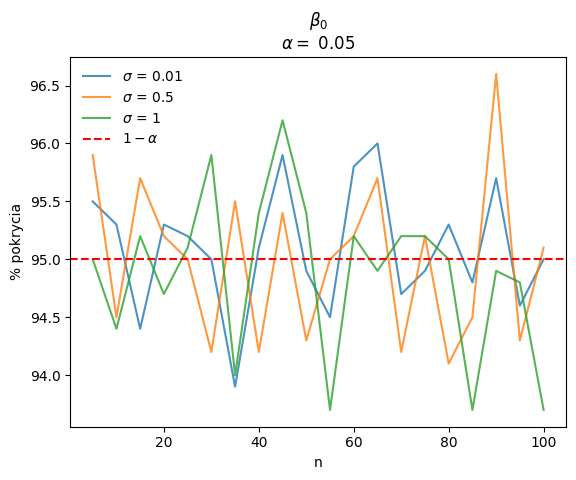

In [100]:
for i in range(len(i_b0_sigma)):
    plt.plot(n, i_b0_sigma[i], alpha=0.8, label=r'$\sigma$ = {}'.format(sigma[i]))
plt.axhline(100 * (1 - alpha), c='r', label=r'$1 - \alpha$', linestyle='--')
plt.legend(loc='best', frameon=False)
plt.xlabel('n')
plt.ylabel('% pokrycia')
plt.title(r'$\beta_0$' + '\n' + r'$\alpha =$ {}'.format(alpha))
plt.show()

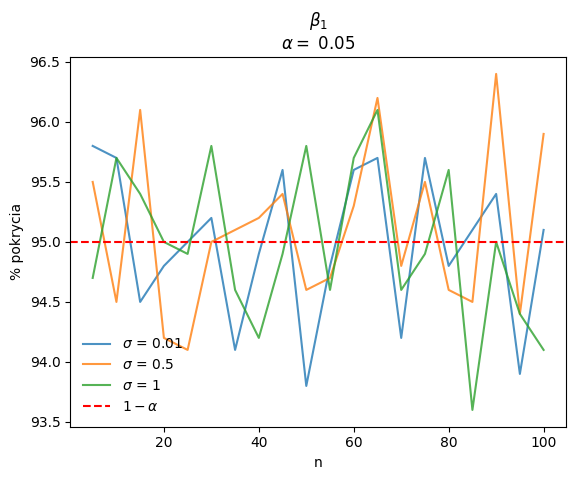

In [104]:
for i in range(len(i_b1_sigma)):
    plt.plot(n, i_b1_sigma[i], alpha=0.8, label=r'$\sigma$ = {}'.format(sigma[i]))
plt.axhline(100 * (1 - alpha), c='r', label=r'$1 - \alpha$', linestyle='--')
plt.legend(loc='lower left', frameon=False)
plt.xlabel('n')
plt.ylabel('% pokrycia')
plt.title(r'$\beta_1$' + '\n' + r'$\alpha =$ {}'.format(alpha))
plt.show()

## Zadanie 2
Wykonaj zad. 1 przy założeniu, że $\sigma$ nie jest znane. Jakie są różnice pomiędzy skonstruowanymi przedziałami ufności uzyskanymi w zad.1 i zad. 2? Wyniki porównaj w zależności od długości próby, wielkości $\alpha$ oraz $\sigma$. Jakie możesz wyciągnąć wnioski na podstawie uzyskanych wyników?

In [30]:
n = np.arange(5,101,5)
M = 1000
beta0 = 2
beta1 = 5
sigma = [0.5]
alpha = 0.05
i_b0_sigma = []
i_b1_sigma = []
i_b0_no_sigma = []
i_b1_no_sigma = []
dlugosc_s_b0 = []
dlugosc_s_b1 = []
dlugosc_no_s_b0 = []
dlugosc_no_s_b1 = []

for s in sigma:
    i_b0_array = np.zeros(len(n))
    i_b1_array = np.zeros(len(n))
    i_b0_no_s_array = np.zeros(len(n))
    i_b1_no_s_array = np.zeros(len(n))
    dlugosc_no_s_b0_array = np.zeros(len(n))
    dlugosc_no_s_b1_array = np.zeros(len(n))
    dlugosc_s_b0_array = np.zeros(len(n))
    dlugosc_s_b1_array = np.zeros(len(n))

    for i in range(len(n)):
        i_b0 = 0
        i_b1 = 0
        i_b0_no_s = 0
        i_b1_no_s = 0
        dl_no_s_b0 = []
        dl_no_s_b1 = []
        dl_s_b0 = []
        dl_s_b1 = []
        for k in range(M):
            x = np.arange(1, n[i]+1, 1)
            epsilon = np.random.normal(0, s, size=n[i])
            Y = beta0 + beta1*x + epsilon
            b1_est, b0_est = poly_fit(x,Y)

            _b0 = b0_est - scipy.stats.norm.ppf(1 - alpha/2) * s * np.sqrt(1/n[i] + np.mean(x)**2 / sum((x - np.mean(x))**2))
            b0_ = b0_est + scipy.stats.norm.ppf(1 - alpha/2) * s * np.sqrt(1/n[i] + np.mean(x)**2 / sum((x - np.mean(x))**2))
            
            _b1 = b1_est - scipy.stats.norm.ppf(1 - alpha/2) * s / np.sqrt(sum((x - np.mean(x))**2))
            b1_ = b1_est + scipy.stats.norm.ppf(1 - alpha/2) * s / np.sqrt(sum((x - np.mean(x))**2))
            
            if beta0 >= _b0 and beta0 <= b0_:
                i_b0 += 1
            if beta1 >= _b1 and beta1 <= b1_:
                i_b1 += 1

            dl_s_b0.append(b0_ - _b0)
            dl_s_b1.append(b1_ - _b1)

            Y_ = b0_est + b1_est*x 
            s_ = np.sqrt(1/(n[i]-2) * sum((Y - Y_)**2))
            _b0_no_s = b0_est - scipy.stats.t.ppf(1 - alpha/2, n[i]-2) * s_ * np.sqrt(1/n[i] + np.mean(x)**2 / sum((x - np.mean(x))**2))
            b0_no_s_ = b0_est + scipy.stats.t.ppf(1 - alpha/2, n[i]-2) * s_ * np.sqrt(1/n[i] + np.mean(x)**2 / sum((x - np.mean(x))**2))

            _b1_no_s = b1_est - scipy.stats.t.ppf(1 - alpha/2, n[i]-2) * s_ * 1 / np.sqrt(sum((x - np.mean(x))**2))
            b1_no_s_ = b1_est + scipy.stats.t.ppf(1 - alpha/2, n[i]-2) * s_ * 1 / np.sqrt(sum((x - np.mean(x))**2))

            if beta0 >= _b0_no_s and beta0 <= b0_no_s_:
                i_b0_no_s += 1
            if beta1 >= _b1_no_s and beta1 <= b1_no_s_:
                i_b1_no_s += 1

            dl_no_s_b0.append(b0_no_s_ - _b0_no_s)
            dl_no_s_b1.append(b1_no_s_ - _b1_no_s)

        dlugosc_no_s_b0_array[i] = np.mean(dl_no_s_b0)
        dlugosc_no_s_b1_array[i] = np.mean(dl_no_s_b1)
        dlugosc_s_b0_array[i] = np.mean(dl_s_b0)
        dlugosc_s_b1_array[i] = np.mean(dl_s_b1)
        i_b0_array[i] = 100 * i_b0/M
        i_b1_array[i] = 100 * i_b1/M

        i_b0_no_s_array[i] = 100 * i_b0_no_s/M
        i_b1_no_s_array[i] = 100 * i_b1_no_s/M

    dlugosc_no_s_b0.append(dlugosc_no_s_b0_array)
    dlugosc_no_s_b1.append(dlugosc_no_s_b1_array)
    dlugosc_s_b0.append(dlugosc_s_b0_array)
    dlugosc_s_b1.append(dlugosc_s_b1_array)
    i_b0_sigma.append(i_b0_array)
    i_b1_sigma.append(i_b1_array)
    i_b0_no_sigma.append(i_b0_no_s_array)
    i_b1_no_sigma.append(i_b1_no_s_array)

# print(i_b0_array, i_b1_array)
print(i_b0_sigma, i_b1_sigma)
print(i_b0_no_sigma, i_b1_no_sigma)
print(dlugosc_no_s_b0, dlugosc_no_s_b1)
print(dlugosc_s_b0, dlugosc_s_b1)

[array([93.9, 94.2, 95.1, 94.2, 95.1, 94.5, 94.2, 95.1, 95.7, 95. , 95.3,
       94. , 94.4, 93.8, 94.5, 94.9, 95.6, 95.5, 94.5, 94.8])] [array([94.6, 94.6, 96. , 94.1, 94.9, 93.8, 94.8, 95.1, 95.2, 95.5, 94.1,
       94.5, 94.8, 94. , 95. , 95.8, 95. , 94.3, 94.2, 94.3])]
[array([94.5, 95.3, 95.2, 95. , 95.6, 93.6, 94. , 95.2, 95.4, 94.3, 95.7,
       95. , 94.5, 94. , 94.1, 94.5, 95.4, 95.2, 94.6, 94.6])] [array([94.4, 95.7, 95.3, 94.4, 95.2, 93.8, 94.2, 95.5, 95. , 94.9, 94.4,
       94.7, 94.7, 94.5, 94.5, 95.4, 95.4, 94.3, 93.8, 94.3])]
[array([3.14441769, 1.54698493, 1.15104169, 0.9615546 , 0.84834477,
       0.76120517, 0.69924787, 0.64644784, 0.60827605, 0.57524599,
       0.54547772, 0.52189483, 0.49843763, 0.47915181, 0.46382834,
       0.44881865, 0.43646592, 0.42043313, 0.4109462 , 0.40001614])] [array([0.94807761, 0.2493192 , 0.12659771, 0.08026903, 0.05706584,
       0.04287771, 0.03387867, 0.02747734, 0.02302909, 0.01963285,
       0.01694717, 0.01487993, 0.01313043, 0.0

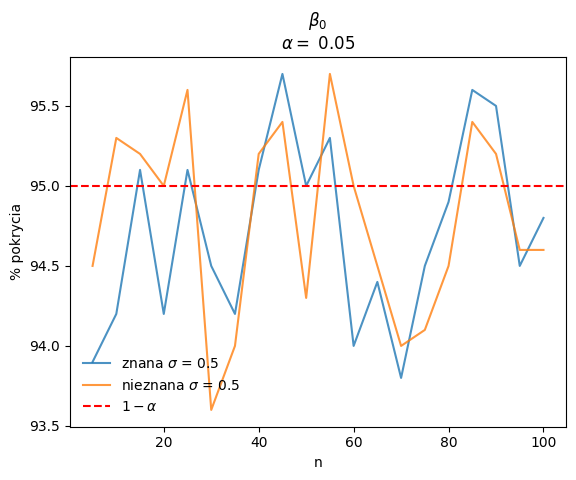

In [31]:
for i in range(len(i_b1_sigma)):
    plt.plot(n, i_b0_sigma[i], alpha=0.8, label=r'znana $\sigma$ = {}'.format(sigma[i]))
    plt.plot(n, i_b0_no_sigma[i], alpha=0.8, label=r'nieznana $\sigma$ = {}'.format(sigma[i]))
plt.axhline(100 * (1 - alpha), c='r', label=r'$1 - \alpha$', linestyle='--')
plt.legend(loc='lower left', frameon=False)
plt.xlabel('n')
plt.ylabel('% pokrycia')
plt.title(r'$\beta_0$' + '\n' + r'$\alpha =$ {}'.format(alpha))
plt.show()

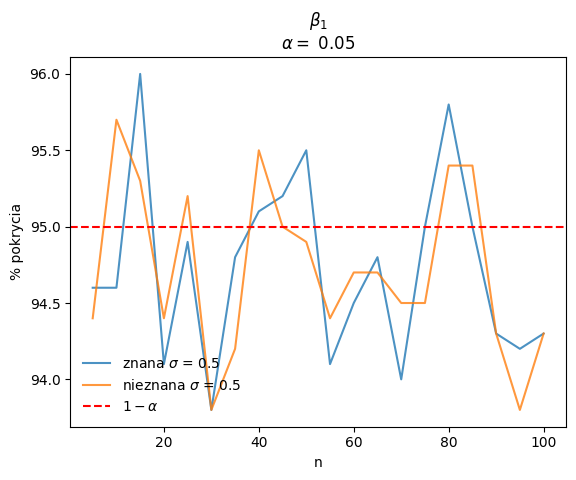

In [32]:
for i in range(len(i_b1_sigma)):
    plt.plot(n, i_b1_sigma[i], alpha=0.8, label=r'znana $\sigma$ = {}'.format(sigma[i]))
    plt.plot(n, i_b1_no_sigma[i], alpha=0.8, label=r'nieznana $\sigma$ = {}'.format(sigma[i]))
plt.axhline(100 * (1 - alpha), c='r', label=r'$1 - \alpha$', linestyle='--')
plt.legend(loc='lower left', frameon=False)
plt.xlabel('n')
plt.ylabel('% pokrycia')
plt.title(r'$\beta_1$' + '\n' + r'$\alpha =$ {}'.format(alpha))
plt.show()

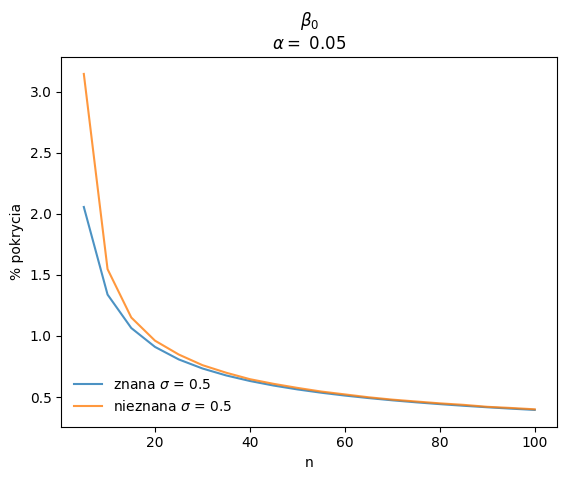

In [33]:
for i in range(len(i_b1_sigma)):
    plt.plot(n, dlugosc_s_b0[i], alpha=0.8, label=r'znana $\sigma$ = {}'.format(sigma[i]))
    plt.plot(n, dlugosc_no_s_b0[i], alpha=0.8, label=r'nieznana $\sigma$ = {}'.format(sigma[i]))
plt.legend(loc='lower left', frameon=False)
plt.xlabel('n')
plt.ylabel('% pokrycia')
plt.title(r'$\beta_0$' + '\n' + r'$\alpha =$ {}'.format(alpha))
plt.show()

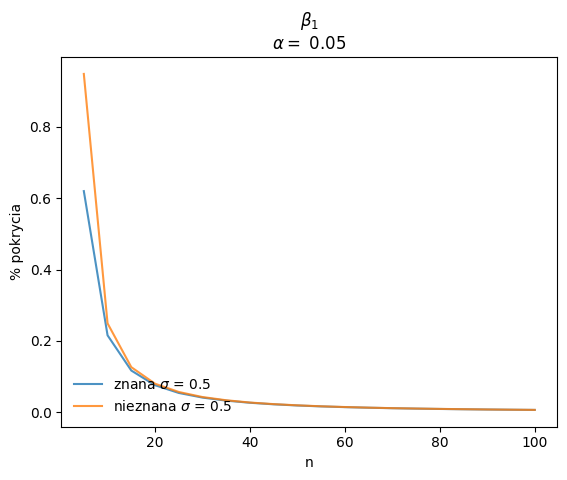

In [34]:
for i in range(len(i_b1_sigma)):
    plt.plot(n, dlugosc_s_b1[i], alpha=0.8, label=r'znana $\sigma$ = {}'.format(sigma[i]))
    plt.plot(n, dlugosc_no_s_b1[i], alpha=0.8, label=r'nieznana $\sigma$ = {}'.format(sigma[i]))
plt.legend(loc='lower left', frameon=False)
plt.xlabel('n')
plt.ylabel('% pokrycia')
plt.title(r'$\beta_1$' + '\n' + r'$\alpha =$ {}'.format(alpha))
plt.show()

## Zadanie 3
Wysymuluj dwuwymiarowy wektor $(x,y)$ opisany ogólnym modelem regresji liniowej dany równaniem (1) przy założeniu, że $\epsilon_i,\; i = 1, 2, ..., n$ są niezależnymi zmiennymi losowymi $\mathcal{N}(0,\sigma)$. Wybierz dowolne wartości $\beta_0, \beta_1$ oraz $\sigma$. Niech $x_1, x_2,...,x_n$ będą zdefiniowane tak jak w zad. 1. Wyznacz przedziały ufności dla wartości średniej zmiennej $Y(x_0)$ dla $x_0 = x + γ$ dla pewnej wielkości $Y$ dla różnych wielkości $n$ przy założeniu, że $\sigma$ jest wielkością znaną i nieznaną. Wyniki przedstaw w zależności od $n$, $\sigma$ oraz $Y$. Przyjmij $\alpha = 0.05$.

In [76]:
alpha = 0.05
beta1 = 5
beta0 = 2
n = 100
x = np.arange(1, n+1, 1)
gamma = np.arange(-1, 1.01, 0.1)
sigma = [5, 3, 1]
x_0 = x_0 = np.mean(x) + gamma
EX = beta0 + beta1*x_0
_mi_list = []
mi_list_ = []

for s in sigma:
    _mi_array = np.zeros(len(gamma))
    mi_array_ = np.zeros(len(gamma))
    for i in range(len(gamma)):
        x_0 = np.mean(x) + gamma[i]
        epsilon = np.random.normal(0, s, size=n)
        Y = beta0 + beta1*x + epsilon
        b1_est, b0_est = poly_fit(x,Y)
        _mi = b0_est + b1_est*x_0 - scipy.stats.norm.ppf(1 - alpha/2) * np.sqrt(s**2 * (1/n + (x_0 - np.mean(x))**2 / sum((x - np.mean(x))**2)))
        mi_= b0_est + b1_est*x_0 + scipy.stats.norm.ppf(1 - alpha/2) * np.sqrt(s**2 * (1/n + (x_0 - np.mean(x))**2 / sum((x - np.mean(x))**2)))
        
        _mi_array[i] = _mi
        mi_array_[i] = mi_
    
    _mi_list.append(_mi_array)
    mi_list_.append(mi_array_)

print(_mi_list, mi_list_)

[array([248.81344102, 248.63847009, 249.53207631, 250.54037069,
       250.24133172, 250.93235297, 250.86171482, 251.50286189,
       251.81129857, 253.37123982, 254.46567365, 253.69325087,
       254.19759669, 254.85406425, 255.03246607, 255.79636561,
       256.25441912, 257.01164608, 257.40087184, 258.72157647,
       258.17951627]), array([249.02929506, 249.7074091 , 249.40967006, 249.99803504,
       251.03270642, 251.77155952, 251.62622584, 252.30144677,
       253.19842294, 253.53069689, 253.84160494, 254.23175726,
       254.75104167, 254.89303765, 255.46048358, 256.47733795,
       256.92385649, 257.39141253, 258.19185444, 258.37103372,
       259.10890216]), array([249.26155009, 249.98885675, 250.28094195, 250.75493489,
       251.1760517 , 251.82014266, 252.33374889, 252.82905109,
       253.31731136, 253.75668899, 254.31883302, 254.73427942,
       255.38690894, 255.95897307, 256.45263989, 256.67802581,
       257.38555491, 257.89248137, 258.30033672, 258.70498731,
       2

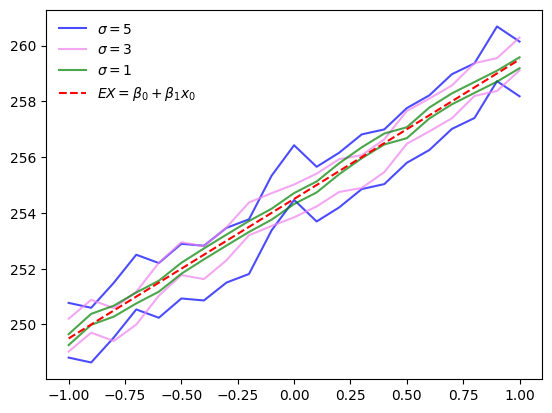

In [77]:
colors = ['b', 'violet', 'g']
for i in range(len(sigma)):
    plt.plot(gamma, _mi_list[i], c=colors[i], alpha=0.7, label=r'$\sigma = {}$'.format(sigma[i]))
    plt.plot(gamma, mi_list_[i], c=colors[i], alpha=0.7)
plt.plot(gamma, EX, c='r',label=r'$EX = \beta_0 + \beta_1 x_0$', linestyle='--')
plt.legend(frameon=False)
plt.show()

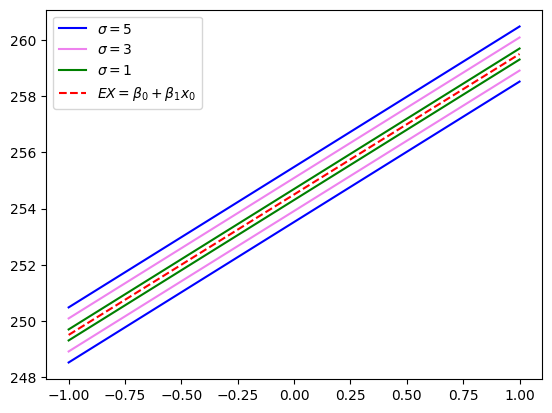

In [89]:
alpha = 0.05
beta1 = 5
beta0 = 2
n = 100
x = np.arange(1, n+1, 1)
gammas = np.arange(-1, 1.1, 0.1)
x_0 = np.mean(x) + gammas
EX = beta0 + beta1*x_0
sigmas = [5, 3, 1]
colors = ['b', 'violet', 'g']

for i, s in enumerate(sigmas):
    epsilon = np.random.normal(0, s, size=n)
    Y = beta0 + beta1*x + epsilon
    b1_est, b0_est = poly_fit(x,Y)
    _mi = EX - scipy.stats.norm.ppf(1 - alpha/2) * np.sqrt(s**2 * (1/n + (x_0 - np.mean(x))**2 / sum((x - np.mean(x))**2)))
    mi_= EX + scipy.stats.norm.ppf(1 - alpha/2) * np.sqrt(s**2 * (1/n + (x_0 - np.mean(x))**2 / sum((x - np.mean(x))**2)))
    
    plt.plot(gammas, _mi, c=colors[i], label=r'$\sigma = {}$'.format(s))
    plt.plot(gammas, mi_, c=colors[i])

plt.plot(gammas, EX, c='r', label=r'$EX = \beta_0 + \beta_1 x_0$', linestyle='--')
plt.legend()
plt.show()

## Zadanie 4
Wysymuluj dwuwymiarowy wektor $(x,y)$ o długości $n = 1000$ opisany ogólnym modelem regresji liniowej (1) dla wybranych wielkosci parametrów $\beta_0, \beta_1, \sigma$ oraz $x_1, x_2, ..., x_n$ zdefiniowanych jak w zad. 1. Skonstruuj prostą regresji na podstawie 990 najmniejszych obserwacji wielkości $x$. Skonstruuj przedział ufności dla prognozy w modelu dla ostatnich 10 największych obserwacji i porównaj z danymi. Zadanie wykonaj przy założeniu, że $\sigma$ jest znana i nieznana.

In [11]:
data = np.loadtxt("zad4_lista1.txt", dtype="float")     # len(data) = 1000

X = np.zeros(len(data))
Y = np.zeros(len(data))
X_d = np.zeros(len(data)-10)
Y_d = np.zeros(len(data)-10)
X_t = np.zeros(10)
Y_t = np.zeros(10)
for i in range(len(data)):
    X[i] = (data[i][0])
    Y[i] = (data[i][1])
    
sort = np.argsort(X)
X = X[sort]
Y = Y[sort]

for i in range(len(data)-10):
    X_d[i] = (X[i])
    Y_d[i] = (Y[i])

for i in range(1,11):
    X_t[i-1] = (X[-i])
    Y_t[i-1] = (Y[-i])

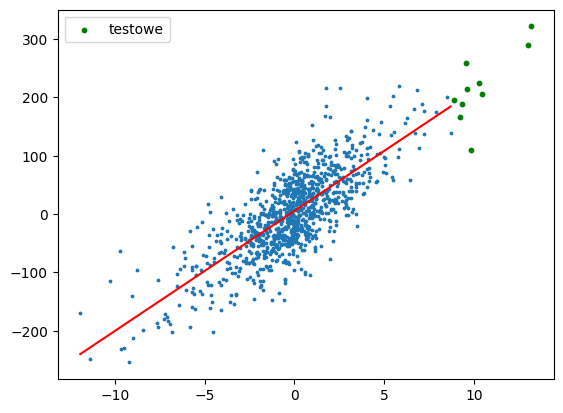

In [14]:
def poly_fit(x,y):
    beta1 = sum(x*(y-np.mean(y)))/sum((x-np.mean(x))**2)
    beta0 = np.mean(y) - beta1*np.mean(x)
    return beta1, beta0

beta_1, beta_0 = poly_fit(X_d,Y_d)
x = np.linspace(min(X_d),max(X_d),len(X_d))
plt.scatter(X_d, Y_d, s=3)
plt.plot(x, beta_1*x + beta_0, color='r')
plt.scatter(X_t, Y_t, color='g', s=10, label='testowe')
plt.legend()
plt.show()

In [15]:
# nieznana sigma

def ufnosci(beta_0, beta_1, X_t, X_d, Y_d, alfa):
    print(type(X_d))
    print(beta_0)
    L = []
    P = []
    print(np.sum(beta_1*X_d))
    z_val = scipy.stats.t.ppf(1-alfa/2, df=len(X_d)-2)
    s = np.sqrt((1/(len(X_d)-2))*np.sum((beta_0+beta_1*X_d-Y_d)**2))
    for i in range(len(X_t)):
        L.append(beta_0 + beta_1*X_t[i] - z_val*s*np.sqrt(1+1/len(X_t)+(X_t[i]-np.mean(X_d))**2/(np.sum((X_t-np.mean(X_d))**2))))
        P.append(beta_0 + beta_1*X_t[i] + z_val*s*np.sqrt(1+1/len(X_t)+(X_t[i]-np.mean(X_d))**2/(np.sum((X_t-np.mean(X_d))**2))))
    return L, P

In [16]:
L, P = ufnosci(beta_0, beta_1, X_t, X_d, Y_d, 0.05)

<class 'numpy.ndarray'>
5.2912423982380306
-4268.193918805646


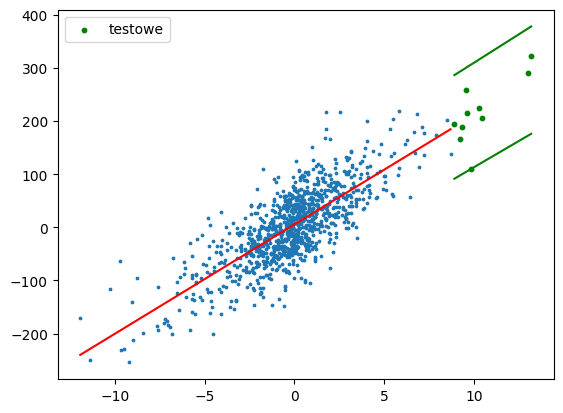

In [18]:
beta_1, beta_0 = poly_fit(X_d,Y_d)
x = np.linspace(min(X_d),max(X_d),len(X_d))
plt.scatter(X_d,Y_d, s=3)
plt.plot(x, beta_1*x+beta_0, color='r')
plt.scatter(X_t, Y_t, color='g', s=10, label='testowe')
plt.plot(X_t, L, color='g')
plt.plot(X_t, P, color='g')
plt.legend()
plt.show()